# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 80 баллов

---

In [ ]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

На занятии мы уже <a href="https://miptstats.github.io/courses/ad_fivt/titanik.html" target="_blank">начинали</a> работать с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных получить некоторое приближенное правило определения, выжил пассажир или нет.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [ ]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [ ]:
train = data.sample(frac=0.7)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
624,625,0,3,"Bowen, Mr. David John ""Dai""",male,21.0,0,0,54636,16.1000,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
414,415,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,STON/O 2. 3101269,7.9250,NaN,S
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19.0,0,2,11752,26.2833,D47,S
...,...,...,...,...,...,...,...,...,...,...,...,...
468,469,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
497,498,0,3,"Shellard, Mr. Frederick William",male,NaN,0,0,C.A. 6212,15.1000,NaN,S
461,462,0,3,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,NaN,S


In [ ]:
test = data.drop(train.index)
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S


Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [ ]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [ ]:
features_train, target_train = get_features_and_target(train)
features_test, target_test = get_features_and_target(test)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

Для начала посмотрим какому проценту пассажиров удалось выжить

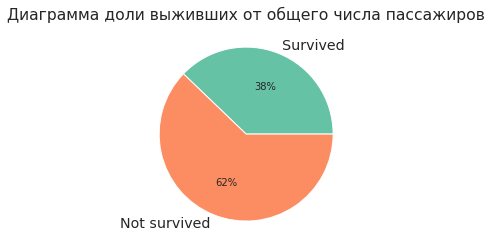

In [ ]:
plt.pie([train[train['Survived'] == 1]['Survived'].count(), train[train['Survived'] == 0]['Survived'].count()], labels=["Survived", "Not survived"], autopct='%1.0f%%')
plt.title("Диаграмма доли выживших от общего числа пассажиров")
None

Разделим людей по половому признаку и заметим, что женщин выжило намного больше (в процентном соотношении). Это логично, так как в первую очередб в трудных ситуациях спасают женщин и детей.

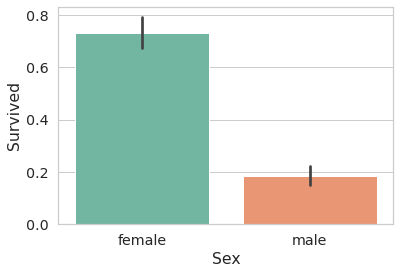

In [ ]:
sns.barplot(data=train, x="Sex", y="Survived")
None

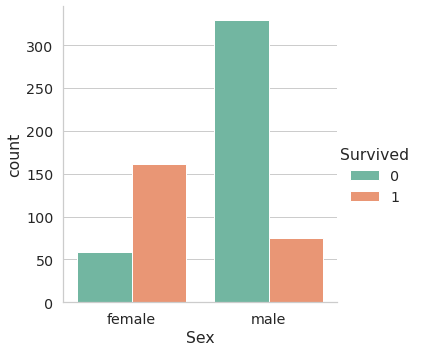

In [ ]:
sns.catplot(data=train, hue="Survived", x = "Sex", kind="count")
None

Теперь разделим людей по классу билета, ведь наверняка спасали в первую очередь людей самого высокого класса. Построив график мы можем в этом убедится

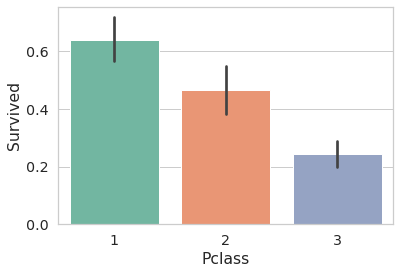

In [ ]:
sns.barplot(data=train, y="Survived", x = "Pclass")
None

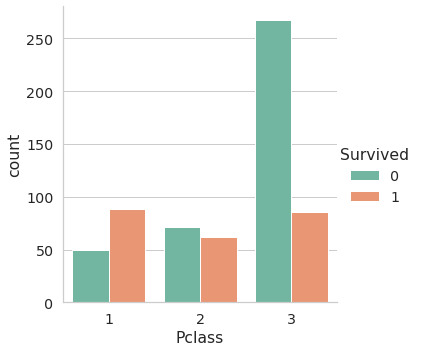

In [ ]:
sns.catplot(data=train, hue="Survived", x = "Pclass", kind="count")
None

Подводя итог значимости этих двум признаков, построим график выживаемости в зависимости от пола и класса. На нем наглядно видно зависимость.


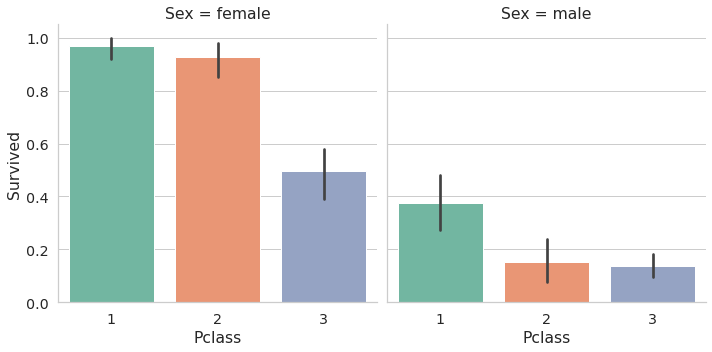

In [ ]:
sns.catplot(
    data=train, x="Pclass", y="Survived", col="Sex",
    kind="bar")
None

Как я уже написал выше, в первую очередь спасали женщин и детей. Зависимоть от пола мы уже рассмотрели. Логично теперь рассмотреть зависимость от возраста. Разобьем данные на промежутки -- возрастные группы (по 10 лет) и построим график зависимости выживаемости от возрастной группы. Из графика видно, что действительно подростки до 16 лет имели больший шанс выжить.

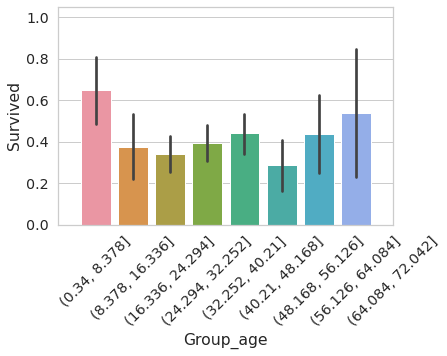

In [ ]:
train["Group_age"] = pd.cut(train["Age"], 10)
train.pivot_table(values="Survived", index="Group_age", aggfunc=np.mean)
sns.barplot(data=train, x="Group_age", y="Survived")
plt.xticks(rotation=45)
plt.xlim((-1,8))
None

Также рассмотри зависимость выживаемости от количества родственников на борту и класса. Построив график, заметим, что в 1 и 2 классах, чем больше родственников, тем больше шанс выжить (Скорее всего родственники помогали друг другу, поэтому имели больший шанс выжить)

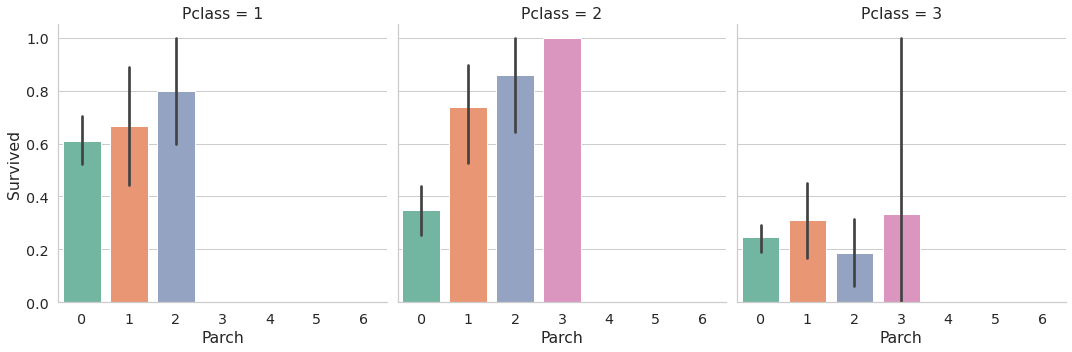

In [ ]:
sns.catplot(
    data=train, x="Parch", y="Survived", col="Pclass",
    kind="bar")
None

Также рассмотрим зависимость выживаемости от стоимости билетов для женщин. Чем дороже билет, тем выше класс, а значит и шанс спастись выше. 

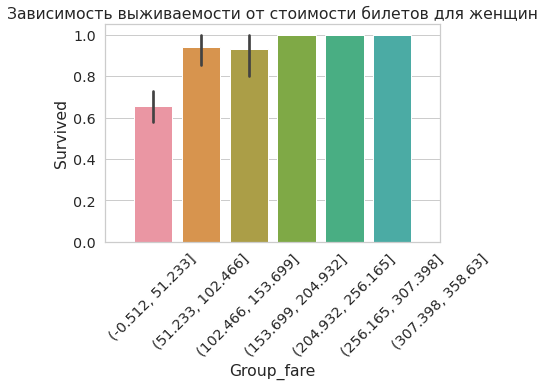

In [ ]:
train["Group_fare"] = pd.cut(train["Fare"], 10)
train.pivot_table(values="Survived", index="Group_fare", aggfunc=np.mean)
sns.barplot(data=train[train["Sex"] == "female"], x="Group_fare", y="Survived")
plt.xlim((-1, 6))
plt.xticks(rotation=45)
plt.title("Зависимость выживаемости от стоимости билетов для женщин")
None

#### 3. Классификация

На основе проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

                      Класс < 2.5?
                   да /         \ нет
                     /           \
            Женщина или         Женщина и кол-во
      ребенок (<= 16 лет)?   детей/родителей на борту > 2?
         да /    \ нет               /         \
           /      \                 /           \
        Выжил    Погиб           Выжил         Погиб

**Дерево 2:**


                        Женщина?
                   да /         \ нет
                     /           \
      Плата за проезд >= 52?     Погиб
           да /    \ нет 
             /      \               
          Выжил    Погиб

Реализуйте полученные деревья по шаблону

In [ ]:
def tree1(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    f = lambda x, y, z, c: int(((y < 2.5) and ((x == "female") or (z <= 16))) or ((y > 2.5) and ((x == "female") and (c > 2))))
    features["Predict"] = features[["Sex", "Pclass", "Age", "Parch"]].apply(lambda x: f(x.Sex, x.Pclass, x.Age, x.Parch), axis=1)
    predicted = features["Predict"]
    return predicted

In [ ]:
def tree2(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    f = lambda x, y: int((x == "female") and (y >= 51))
    features["Predict"] = features[["Sex", "Fare"]].apply(lambda x: f(x.Sex, x.Fare), axis=1)
    predicted = features["Predict"]
    return predicted

#### 4. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Критерием корректности деревьем -- процент совпадения полученного значения целевого признака ("Survived") с истинным значением находящемся в predicted_test

Реализуйте данный критерий по шаблону

In [ ]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    return np.sum((predicted == target)) / len(target.axes[0])

Посчитайте качество полученных ранее деревьев.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

Подсчитаем процент совпадения данных при обработке первым деревом с истинными значениями:


In [ ]:
criteria(target_test, tree1(features_test)) * 100

80.52434456928839

Подсчитаем процент совпадения данных при обработке вторым деревом с истинными значениями:


In [ ]:
criteria(target_test, tree2(features_test)) * 100

69.66292134831461

**5. Метод ближайшего соседа**

В домашнем задании 1 вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

Категориальный признак Sex заменяем на численный.
Для каждой таблицы заменим пропуски на среднее значение данного столбца по фрейму и находим ближайших соседей:

In [ ]:
def knn(features, train_features, train_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''
    train_features1 = train_features
    features1 = features
    train_features1['Sex'] = train_features1.Sex.eq('female').mul(1)
    features1['Sex'] = features1.Sex.eq('female').mul(1)
    features1["Predict"] = ""
    train_features1.fillna(value=train_features1.mean(), inplace=True)
    features1.fillna(value=features1.mean(), inplace=True)
    for i in range(len(features1)):
      f = lambda x1, x2, x3, x4, x5, x6: (x1 - features1.iloc[i][0])**2 + (x2 - features1.iloc[i][1])**2 + (x3 - features1.iloc[i][2])**2 + (x4 - features1.iloc[i][3])**2 + (x5 - features1.iloc[i][4])**2 + (x6 - features1.iloc[i][5])**2
      distances = train_features1.apply(lambda x: f(x.Pclass, x.Sex, x.Age, x.SibSp, x.Parch, x.Fare), axis=1)
      index = np.argsort(distances)
      res = 0
      for j in index[0 : k]:
        res += train_target.iloc[j]
      if res >= (k // 2):
        features1.iloc[[i],[6]] = 1
      else:
        features1.iloc[[i],[6]] = 0
    return features1["Predict"]

In [ ]:
knn_res = []
for k in range(1, 11, 1):
  tmp = criteria(target_test, knn(features_test, features_train, target_train, k)) * 100
  knn_res.append(tmp)

<ipython-input-42-716a33dac0e0>:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  features1.fillna(value=features1.mean(), inplace=True)


Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

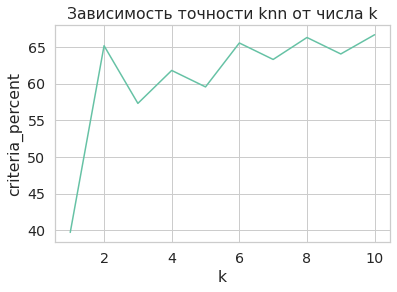

In [ ]:
pr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df = pd.DataFrame(list(zip(pr, knn_res)), columns=['k', 'criteria_percent'])
sns.lineplot(data=df, x='k', y='criteria_percent')
plt.title("Зависимость точности knn от числа k")
None

Метод knn не очень точен, так как мы не учитываем вес каждого признака, а считаем их равными (а так получается что вклад цены билета гораздо выше вклада пола, что на самом деле категорически неверно). Но при увелечении k точность все равно растет, как и должно быть.

#### 6. Выводы

Мы проанализировали данные по пассажирам, выявили определяющие признаки выживаемости для человека (Пол, Класс и т.д.). Изучили два способа: разрешающее дерево и ближайщие k соседей.
Наибольшую точность дал метод с использованием первого разрешающего дерева.
Метод ближайщих k соседей не очень точен, в первую очередь из-за того, что мы не отнормировали признаки. Получилось, что вклад признака Пол гораздо меньше, чем признака Fare (стоимости билета), но в реалии же, как мы убедились, пол является определяющим признаком.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2

<a target="_blank" href="yelp.com">Yelp</a> — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

![Yelp_Logo_No_Outline_Color.jpg](attachment:Yelp_Logo_No_Outline_Color.jpg)

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате `json` можно посмотреть по <a target="_blank" href="https://www.kaggle.com/yelp-dataset/yelp-dataset/data">ссылке</a>.

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. <a target="_blank" href="https://yandex.ru/company/researches/2017/msk_mobile_map">Пример</a> с несколько другой задачей.
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [ ]:
data2 = pd.read_csv('yelp_business.csv')
data2.head(5)

,Unnamed: 0,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,is_open,categories
0,0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,1,Dentists;General Dentistry;Health & Medical;Or...
1,1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1,Departments of Motor Vehicles;Public Services ...
3,3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,0,Sporting Goods;Shopping
4,4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. В таблице должен быть указан город (название) и количество компаний в этом городе.

*Подсказка.* Для выполнения стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`.

In [ ]:
tmp = data2[['business_id', 'city']].groupby(by=['city']).count()
tmp.sort_values(by=['business_id'], ascending=False, inplace=True)
tmp.head(5)

,business_id
city,
Las Vegas,26775
Phoenix,17213
Toronto,17206
Charlotte,8553
Scottsdale,8228


Пусть `N` &mdash; город с наибольшим количеством компаний. Оставьте в таблице только записи, соответствующие городу `N`. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ &mdash; широту.

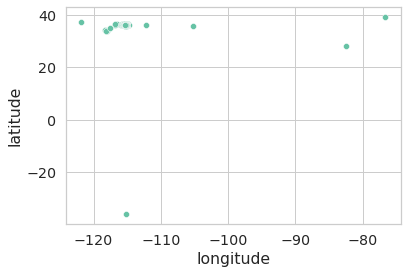

In [ ]:
data2 = data2[data2['city'] == 'Las Vegas']
sns.scatterplot(data=data2, x="longitude", y="latitude")
None

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. На этом графике должны выделяться некоторые улицы. 

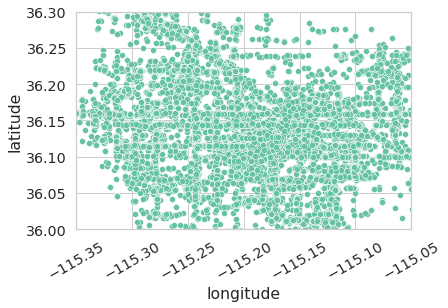

In [ ]:
sns.scatterplot(data=data2, x="longitude", y="latitude")
plt.xlim((-115.35, -115.05))
plt.ylim((36, 36.3))
plt.xticks(rotation=30)
None

Разберитесь с тем, как подгрузить интерактивную карту города в качестве фона графика. Можно пойти двумя следующими способами.
1. Изучить <a href="https://miptstats.github.io/courses/python/11_plotly.html" target="_blank">материалы</a> по библиотеке <a href="https://plotly.com/python/" target="_blank"><b>Plotly</b></a>. Возможно, потребуется также заглянуть в документацию.
1. Поразбираться с библиотекой <a href="https://github.com/python-visualization/folium" target="_blank"><b>Folium</b></a>. Посмотрите множество <a href="https://nbviewer.org/github/python-visualization/folium/tree/main/examples/" target="_blank">примеров</a>, может также помочь <a href="https://proglib.io/p/python-web-map" target="_blank">статья на русском</a>.

*Внимание!* Интерактивная карта может не сохраниться в ноутбуке, а если сохранится, то вес ноутбука может превзойти 20 Мб. Рекомендуется сохранить карту в html и отправить ее отдельным файлом в бот.

In [ ]:
data2_copy = data2.loc[(data2["longitude"] >= -115.4) & (data2["longitude"] <= -114.9) & (data2["latitude"] >= 35.9) & (data2["latitude"] <= 36.3)]

In [ ]:
import folium
map = folium.Map(location=[36.10,-115.10], zoom_start = 10)
sample1 = data2_copy.sample(frac=0.01)

for i, j in zip(sample1["longitude"], sample1["latitude"]):
  folium.Marker(location=[j, i], icon=folium.Icon(color = 'gray')).add_to(map)
map.save("map1.html")
map

Если все получилось, вы молодцы! Далее в этой задаче тоже можно делать интерактивные карты.

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [ ]:
data3 = pd.read_csv('yelp_review.csv')

В подгруженной таблице оценок оставьте только компании города `N`. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. 

*Подсказка.* Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [ ]:
max_city = pd.read_csv('yelp_business.csv')
max_city = max_city[max_city['city'] == 'Las Vegas']

In [ ]:
estimates = data3.set_index('business_id')
estimates = estimates.loc[max_city['business_id']]
estimates.reset_index(inplace=True)
estimates

,business_id,Unnamed: 0,stars
0,kCoE3jvEtg6UVz5SOD3GVw,456053,4
1,kCoE3jvEtg6UVz5SOD3GVw,1093900,1
2,kCoE3jvEtg6UVz5SOD3GVw,2039047,5
3,kCoE3jvEtg6UVz5SOD3GVw,2979380,5
4,kCoE3jvEtg6UVz5SOD3GVw,4844650,5
...,...,...,...
1604222,9ouC6BpmjFpLfHeQnLQqng,4857506,5
1604223,9ouC6BpmjFpLfHeQnLQqng,5256464,5
1604224,n9a-3YhibkMDUEgncIivHg,779637,5
1604225,n9a-3YhibkMDUEgncIivHg,1222296,1


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. 

*Подсказка.* Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [ ]:
table_estim = estimates[['business_id', 'stars']].groupby(by='business_id').aggregate([np.mean, np.size])

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы. Красивые имена &mdash; то, что будет понятно простому человеку при чтении ваших результатов. Как именно их назвать &mdash; задача аналитика, то есть в данном случае ваша :)

In [ ]:
table_estim.columns = ["Средняя оценка", "Количество отзывов"]
table_estim.head(5)

,Средняя оценка,Количество отзывов
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19


Соедините две полученные ранее таблицы по компаниям города `N` в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index`. В одной из них это уже должно было быть сделано.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

*Подсказка.* Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.

In [ ]:
data2 = data2.set_index('business_id').join(table_estim)

In [ ]:
data2 = data2[['latitude', 'longitude', 'categories', 'name', 'Средняя оценка', 'Количество отзывов']]
data2

,latitude,longitude,categories,name,Средняя оценка,Количество отзывов
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.207430,-115.268460,Real Estate Services;Real Estate;Home Services...,"""BDJ Realty""",4.000000,5
OD2hnuuTJI9uotcKycxg1A,36.197484,-115.249660,Shopping;Sporting Goods,"""Soccer Zone""",1.444444,9
VBHEsoXQb2AQ76J9l8h1uQ,36.085051,-115.119421,Shopping;Jewelry;Watch Repair;Local Services,"""Alfredo's Jewelry""",4.739130,23
1Jp_hmPNUZArNqzpbm7B0g,36.056382,-115.269332,Home Services;Lighting Fixtures & Equipment;Lo...,"""Task Electric""",4.450000,20
DPQnTnNw2PJj7DdENM98Cw,36.105196,-115.056880,Nurseries & Gardening;Home & Garden;Shopping,"""Star Nursery""",3.680000,25
...,...,...,...,...,...,...
swjz4q8gI79Ndg4APuHEUA,36.134355,-115.224462,Real Estate Services;Home Services;Property Ma...,"""Stonegate Real Estate Services""",4.466667,15
pUhU5ohYv65g8B47dTXAKA,36.173589,-115.116779,Coffee & Tea;Food,"""Starbucks""",2.400000,35
sH9WsMj8sNTTSAUWv4UEEg,36.055130,-115.243488,Mobile Phone Accessories;Mobile Phones;Electro...,"""Sprint Store""",3.857143,35


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

In [ ]:
import folium
def color_change(elev):
    if(elev <= 3):
        return('red')
    elif(3 <= elev < 4):
        return('orange')
    else:
        return('green')

map = folium.Map(location=[36.10,-115.10], zoom_start = 9.5)
sample2 = data2.sample(frac=0.01)

for i, j, k in zip(sample2["longitude"], sample2["latitude"], sample2["Средняя оценка"]):
  folium.Marker(location=[j, i], icon=folium.Icon(color=color_change(k))).add_to(map)
map.save("map2.html")
map

Чтобы получить районы города, то есть разделить город на "клетки", округлите значения широты и долготы, подобрав оптимальный размер района. 

*Подсказка.* Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [ ]:
def color_change(elev):
    if(elev <= 3):
        return('red')
    elif(3 <= elev < 4):
        return('orange')
    else:
        return('green')

map = folium.Map(location=[36.10,-115.10], zoom_start = 9.5)
sample3 = data2.sample(frac=0.1)

for i, j, k in zip(np.round(sample3["longitude"]*20, decimals=0)*0.05, np.round(sample3["latitude"]*20, decimals=0)*0.05, sample3["Средняя оценка"]):
  folium.Marker(location=[j, i], icon=folium.Icon(color=color_change(k))).add_to(map)
map.save("map3.html")
map

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений &mdash; оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

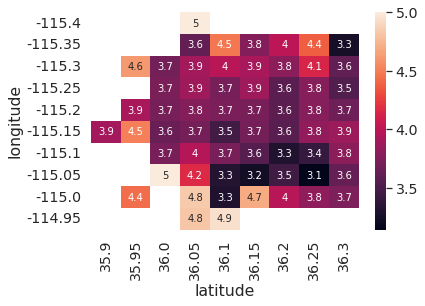

In [ ]:
data2_cop = data2
data2_cop = data2_cop.loc[(data2["longitude"] >= -115.38) & (data2["longitude"] <= -114.9) & (data2["latitude"] >= 35.9) & (data2["latitude"] <= 36.3)]
data2_cop["longitude"] = np.round(np.round(data2_cop["longitude"]*20, decimals=0)*0.05, decimals=2)
data2_cop["latitude"] = np.round(np.round(data2_cop["latitude"]*20, decimals=0)*0.05, decimals=2)
yelp_pivot_table = pd.pivot_table(data2_cop, index="longitude", columns="latitude", values="Средняя оценка", aggfunc='mean', dropna=True)
sns.heatmap(yelp_pivot_table, annot=True)
None

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** Из-за автоматической настройки цветовой гаммы ошибочно сильным кажется разница между близкими значениями. То есть между оценками 3.2 и 4.2 цвет будет сильно отличаться, хотя на самом деле это довольно близкие значения. Если мы настроим цветовую гамму так, что 0 -- минимум, а 5 -- максимум, то такого не будет. Также, если в районе очень мало компаний, он может казаться ошибочно хорошим. 

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

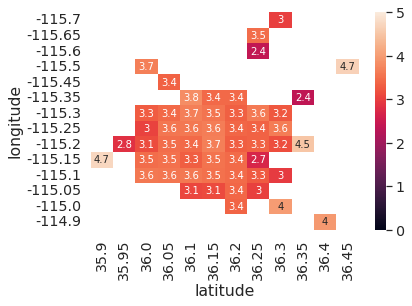

In [ ]:
sns.heatmap(yelp_pivot_table, annot=True, vmin=0, vmax=5)
None

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Этот график наглядней из-за правильной гаммы цветов. Поэтому он дает более явное представление о оценке района.

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `restaurant`. Обратите внимание, что в анализе данных часто нет четкого формата данных. Например, данное слово может быть написано как с большой буквы, так и с маленькой; может как разделяться `;`, так и не разделяться. При возникновении недопонимания стоит посмотреть данные.

Составьте таблицу, в которой будет информация о всех ресторанах города `N`, для которых имеется не менее $5$ отзывов. Далее постройте heatmap-график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

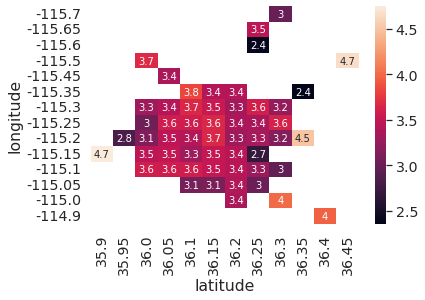

In [ ]:
rests = data2[data2['categories'].str.lower().str.contains('restaurant')]
rests = rests[rests['Количество отзывов'] >= 5]
rests_copy = rests
rests_copy["longitude"] = np.round(np.round(rests_copy["longitude"]*20, decimals=0)*0.05, decimals=2)
rests_copy["latitude"] = np.round(np.round(rests_copy["latitude"]*20, decimals=0)*0.05, decimals=2)
yelp_pivot_table = pd.pivot_table(rests_copy, index="longitude", columns="latitude", values="Средняя оценка", aggfunc='mean', dropna=True)
sns.heatmap(yelp_pivot_table, annot=True)
None

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** Большое количество отзывов помогает пользователю понять, насколько нравится этот ресторан большой выборке людей.

Кот Василий из города `N` очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [ ]:
rests2 = data2[data2['categories'].str.lower().str.contains('restaurant')]
rests2 = rests2[rests2['Количество отзывов'] >= 5]
result = rests2[rests2['Количество отзывов'] >= 50]
result.sort_values('Средняя оценка', ascending=False).head(10)

,latitude,longitude,categories,name,Средняя оценка,Количество отзывов
business_id,,,,,,
iBPyahdJRP5y0t25fF2W9w,36.114537,-115.172678,Food Tours;Restaurants;Event Planning & Servic...,"""Lip Smacking Foodie Tours""",4.966480,179
Fmij544FE1iOruoxI41kew,36.152477,-115.151945,Restaurants;Burgers;Food Stands;Sandwiches;Hot...,"""Pepito Shack""",4.907692,65
qw9SyduMZ53KB6GlBQqvZQ,36.125960,-115.184846,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...,"""Bosa Boba Cafe""",4.890909,55
k9b96JXlNewj36ddrce9Jw,36.166783,-115.286197,Tacos;Street Vendors;Farmers Market;Vegetarian...,"""Garden Grill""",4.868132,91
IhNASEZ3XnBHmuuVnWdIwA,36.054195,-115.242443,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...,"""Brew Tea Bar""",4.848069,1165
k5ddmLvAKKw9zSusRPM2cQ,36.116549,-115.088115,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...,"""Poppa Naps BBQ""",4.836538,104
8fFTJBh0RB2EKG53ibiBKw,36.101741,-115.100359,Restaurants;Breakfast & Brunch;Cafes,"""Zenaida's Cafe""",4.833333,180
l1GJnB9TJgGgEeI4at1M0A,36.098527,-115.148446,Caterers;Mexican;Restaurants;Food;Event Planni...,"""El Frescos Cocina Mexicana""",4.816754,191
hFT3HuxVZJb1uYEsYfp-0A,36.159742,-115.232738,Adult Entertainment;Lounges;Hookah Bars;Restau...,"""Blaqcat Ultra Hookah Lounge""",4.809524,63


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

In [ ]:
rests2 = rests2[rests2['Количество отзывов'] >= 50]
rests2 = rests2[rests2['Средняя оценка'] >= 4.7]

def color_change(elev):
    if elev >= 4.807017:
      return 'green'
    else:
      return 'red'
map = folium.Map(location=[36.10,-115.10], zoom_start = 11)

for i, j, k in zip(rests2['longitude'], rests2['latitude'], rests2['Средняя оценка']):
  folium.Marker(location=[j, i], icon=folium.Icon(color=color_change(k))).add_to(map)
map.save("map4.html")
map

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** Мы изучили данные о компаниях в некоторых городах мира. Выявили город с наибольшим числом компаний -- Лас-Вегас и отобразили их на карте. Дальше изучили информацию по отзывам о каждой компании и сопоставили каждой компании среднюю оценку. Разбили город на районы и каждому району сопоставили среднюю оценку компаний в районе. Потом изучили данные исключительно по ресторанам и нашли топ 10 лучших.